# AiiDA-JuTools Demo

Date: 2022-11-30.

Decription: Demo of [AiiDA-JuTools](https://github.com/JuDFTteam/aiida-jutools) for [JuDFTteam](https://github.com/JuDFTteam) AiiDA [hackathon 2022-12-01](https://iffmd.fz-juelich.de/ud8C294VQ5achi2GGj-D9A#). Intended to be run on [iffAiiDA](https://ifflogin.fz-juelich.de/), any AiiDA v1.x image there (for instance, `aiida-stable`, `aiida-develop`). Requires existence of AiiDA computer node `iffslurm` (IFF cluster).

## What is AiiDA-JuTools

### The marketing version

![IAS-1 Software Stack](img/ias-1-software-stack/ias-1-software-stack.png)

**AiiDa-JuTools** is ...

* For AiiDA users in general: Make work with AiiDA simpler, faster, more effective.
* For AiiDA users at IAS-1: Avoid reinventing the wheel. Share common solutions.
* For developers at IAS-1: Share common solutions, for JuDFTteam AiiDA plugins.

### The JuDFTteam version

> *Our common kitchen*
>
> *"If I have a mixer, I put it in the kitchen (with the manual!). Then not everyone has buy their own mixer."*

Contributing: In an iffaiida-image, run `setup-ssh-server` in a terminal. Follow the instructions (needs [SSH key -- based access](https://iffmd.fz-juelich.de/-sZTHayUSFaI7dPdbwEuPg#How-to-add-an-SSH-key-for-remote-access)). Connect your local IDE ([VSCode](https://code.visualstudio.com/docs/remote/remote-overview), [PyCharm Professional](https://www.jetbrains.com/help/pycharm/remote.html), ...) to your iffAiiDA Python environment. Now you can edit the `aiida-jutools` source code and share your own AiiDA JuTools with your colleagues via GitHub. Johannes can help you set this up.

## Setup notebook for the demo

### User-specific constants

Adjust if needed.

In [60]:
HOME_DIR = '~/Home/JupyterHub'
AIIDA_PROFILE_NAME = 'default'

### Automatically set constants

In [61]:
# set by the notebook
JUTOOLS_REPO_DIR = '' # set dynamically below
JUTOOLS_DEMO_SUBDIR = '/notebooks/aiida-jutools-demo'

### Imports

In [62]:
from pathlib import Path
import os
import sys
import shutil

In [75]:
import aiida
from aiida.orm import QueryBuilder, Node, Group

In [64]:
aiida.load_profile(AIIDA_PROFILE_NAME)

### Demo helper tools

In [65]:
def get_package_path(package) -> str:
    return os.path.dirname(package.__file__)

In [66]:
def list_package_modules(package) -> list:
    """Return list of modules inside an imported Python package."""
    from types import ModuleType
    
    if not isinstance(package, ModuleType):
        return []
    
    # reference: https://stackoverflow.com/a/1310912
    import os.path, pkgutil
    pkgpath = get_package_path(package)
    return [name for _, name, _ in pkgutil.iter_modules([pkgpath])]
    
    # # alternative, list includes __init__.py and such
    # return [path for path in os.listdir(os.path.dirname(jutools.__file__))]

## Getting AiiDA-JuTools

Google aiida-jutools, copy installation instruction from the README.

In [12]:
!pip install -e git+https://github.com/JuDFTteam/aiida-jutools@develop#egg=aiida-jutools

Obtaining aiida-jutools from git+https://github.com/JuDFTteam/aiida-jutools@develop#egg=aiida-jutools
  Cloning https://github.com/JuDFTteam/aiida-jutools (to revision develop) to /opt/aiida-kernel/src/aiida-jutools
  Running command git clone --filter=blob:none --quiet https://github.com/JuDFTteam/aiida-jutools /opt/aiida-kernel/src/aiida-jutools
  Running command git checkout -b develop --track origin/develop
  Switched to a new branch 'develop'
  Branch 'develop' set up to track remote branch 'develop' from 'origin'.
  Resolved https://github.com/JuDFTteam/aiida-jutools to commit 1cfc6734a98d55d1c57a22da322d08ee731d8b2d
  Preparing metadata (setup.py) ... done
  Running setup.py develop for aiida-jutools

[notice] A new release of pip available: 22.2 -> 22.3.1
[notice] To update, run: pip install --upgrade pip


Before proceeding, restart notebook kernel for change to take effect.

Recommended way to import JuTools.

In [67]:
import aiida_jutools as jutools

Now copy the demo notebook to somehwere where you can open and run it.

In [68]:
JUTOOLS_REPO_DIR = Path(get_package_path(jutools)).parent

In [71]:
!echo "cp -r {JUTOOLS_REPO_DIR}{JUTOOLS_DEMO_SUBDIR} {HOME_DIR}"

cp -r /opt/aiida-kernel/src/aiida-jutools/notebooks/aiida-jutools-demo ~/Home/JupyterHub


In [ ]:
!cp -r {JUTOOLS_REPO_DIR}{JUTOOLS_DEMO_SUBDIR} {HOME_DIR}

Open the notebook. You are all set up to run this demo locally on your own AiiDA database.

## What's in AiiDA-JuTools?

In [72]:
list_package_modules(jutools)

['_dev',
 'code',
 'computer',
 'group',
 'io',
 'logging',
 'meta',
 'node',
 'plugins',
 'process',
 'process_functions',
 'structure',
 'submit']

Type `jutools`, play around with tab completion on `jutools.`. All tools are available and documented through this import.

Time for a walkthrough of the JuTools modules!

## `.code` and `.computer`

In [43]:
jutools.computer.get_computers()

[<Computer: iffslurm (iffslurm), pk: 1>,
 <Computer: claix18 (localhost), pk: 2>,
 <Computer: localhost (iff734), pk: 3>,
 <Computer: iff734 (iff734), pk: 4>]

In [39]:
iffslurm = jutools.computer.get_computers('slurm')[0]

In [44]:
jutools.computer.shell_command(iffslurm, "whoami")

(0, 'wasmer\n', '')

In [40]:
jutools.computer.get_queues(iffslurm)

Idle nodes left on computer 'iffslurm': 59


[['th1', 24],
 ['th1-2020-32', 16],
 ['oscar', 9],
 ['th1-2020-gpu', 3],
 ['th1-2020-64', 3],
 ['viti', 2],
 ['th2-gpu', 2]]

In [41]:
jutools.code.get_code(computer_name_pattern='iff', code_name_pattern='kkr', queue_name='th1')

Idle nodes left on computer 'iffslurm': 59


<Code: Remote code 'kkrhost_3.5_intel' on iffslurm, pk: 148, uuid: 2e3a0d2b-6737-40aa-925a-cb1f03444ca4>

In [45]:
optman = jutools.computer.ComputerOptionsManager()

Info: ComputerOptionsManager: Call initialize() before use.


In [46]:
optman.initialize()

Initializing computer options configs: ['localhost', 'iffslurm', 'claix18', 'claix16'].
OptionsConfig 'localhost':
Loaded computer options groups: ['computer_options/localhost'].
Loaded 2, created 0 default computer options nodes. Use get_options() to load or create options nodes.
OptionsConfig 'iffslurm':
Loaded computer options groups: ['computer_options/iffslurm'].
Loaded 8, created 0 default computer options nodes. Use get_options() to load or create options nodes.
OptionsConfig 'claix18':
Loaded computer options groups: ['computer_options/claix18'].
Loaded 1, created 0 default computer options nodes. Use get_options() to load or create options nodes.
OptionsConfig 'claix16':
Loaded computer options groups: ['computer_options/claix16'].
Loaded 1, created 0 default computer options nodes. Use get_options() to load or create options nodes.


In [47]:
optman.iffslurm.computers

[<Computer: iffslurm (iffslurm), pk: 1>]

In [49]:
optman.iffslurm.options

[<Dict: uuid: 41ea72d7-2376-49d1-9110-b8a762e0ae19 (pk: 26323)>,
 <Dict: uuid: 10f58ca9-e1ea-4f48-8fd1-605be9df67c9 (pk: 26321)>,
 <Dict: uuid: 65f510dc-2755-418d-8e24-64b5be574a20 (pk: 26325)>,
 <Dict: uuid: 095cb3d9-041d-4d1e-bd6f-dd680cc78b00 (pk: 26319)>,
 <Dict: uuid: 3e4be4a6-60f5-41d2-8c94-ca8226887e87 (pk: 26320)>,
 <Dict: uuid: 62c8bf6b-ced7-4300-8d1d-4f46142f462a (pk: 26322)>,
 <Dict: uuid: 791c92e4-be98-4281-b95d-4dc247c5a9e5 (pk: 26318)>,
 <Dict: uuid: 452a56d2-30f5-435b-bf5d-4a1b73dc54df (pk: 26324)>]

In [50]:
options = optman.iffslurm.get_options(computer_name='iffslurm', queue_name='th1', account='wasmer')

Info: _OptionsConfig 'iffslurm', get_options(): 
Missing mandatory argument 'queue_name'. Try find matching computer and call get_queues().
Try to get computer from config's assigned computers.
Try to get computer from name pattern 'iffslurm'.
Idle nodes left on computer 'iffslurm': 59
Found queue_names '['th1', 'th1-2020-32', 'oscar', 'th1-2020-gpu', 'th1-2020-64', 'viti', 'th2-gpu']'.
Did not find specified computer options in config. Create options node and store.
Created and stored options  node(s) [<Dict: uuid: f6329f58-cd30-4e33-aed3-c0b0c24061f6 (pk: 26499)>].


In [52]:
options = options[0]

In [53]:
options.attributes

{'withmpi': True,
 'resources': {'num_machines': 1, 'tot_num_mpiprocs': 12},
 'queue_name': 'th1',
 'max_wallclock_seconds': 86400,
 'custom_scheduler_commands': '#SBATCH --account=wasmer'}

In [55]:
optman.get_help(mode='keywords')

{'options_fields': ['account',
  'additional_retrieve_list',
  'append_text',
  'custom_scheduler_commands',
  'environment_variables',
  'import_sys_environment',
  'input_filename',
  'max_memory_kb',
  'max_wallclock_seconds',
  'mpirun_extra_params',
  'output_filename',
  'parser_name',
  'prepend_text',
  'priority',
  'qos',
  'queue_name',
  'resources',
  'scheduler_stderr',
  'scheduler_stdout',
  'stash',
  'submit_script_filename',
  'withmpi'],
 'resources_fields': {'localhost': ['num_machines',
   'num_mpiprocs_per_machine',
   'num_cores_per_machine',
   'num_cores_per_mpiproc',
   'tot_num_mpiprocs'],
  'iffslurm': ['num_machines',
   'num_mpiprocs_per_machine',
   'num_cores_per_machine',
   'num_cores_per_mpiproc',
   'tot_num_mpiprocs'],
  'claix18': ['num_machines',
   'num_mpiprocs_per_machine',
   'num_cores_per_machine',
   'num_cores_per_mpiproc',
   'tot_num_mpiprocs'],
  'claix16': ['num_machines',
   'num_mpiprocs_per_machine',
   'num_cores_per_machine',
   

In [59]:
optman.get_help('descriptions', 'custom_scheduler_commands', 'submit_script_filename')

{'custom_scheduler_commands': {'name': 'custom_scheduler_commands',
  'required': 'False',
  'valid_type': "<class 'str'>",
  'help': 'Set a (possibly multiline) string with the commands that the user wants to manually set for the scheduler. The difference of this option with respect to the `prepend_text` is the position in the scheduler submission file where such text is inserted: with this option, the string is inserted before any non-scheduler command',
  'default': '',
  'non_db': 'True'},
 'submit_script_filename': {'name': 'submit_script_filename',
  'required': 'False',
  'valid_type': "<class 'str'>",
  'help': 'Filename to which the job submission script is written.',
  'default': '_aiidasubmit.sh',
  'non_db': 'True'}}

## `.group` and `.node`

In [74]:
jutools.group.verdi_group_list(label_filter='ok')

[['label', 'id', 'type_string'],
 ['imp_embeddings_for_ml/host_gf/finished_ok', 50, 'core'],
 ['imp_embeddings_for_ml/host_gf/scale_factor_0.8/finished_ok', 51, 'core'],
 ['imp_embeddings_for_ml/host_gf/scale_factor_0.9/finished_ok', 52, 'core'],
 ['imp_embeddings_for_ml/host_gf/scale_factor_1.0/finished_ok', 39, 'core'],
 ['imp_embeddings_for_ml/host_gf/scale_factor_1.1/finished_ok', 53, 'core'],
 ['imp_embeddings_for_ml/host_gf/scale_factor_1.2/finished_ok', 47, 'core'],
 ['imp_embeddings_for_ml/host_scf/finished_ok', 37, 'core'],
 ['imp_embeddings_for_ml/host_scf/scale_factor_0.8/finished_ok', 44, 'core'],
 ['imp_embeddings_for_ml/host_scf/scale_factor_0.9/finished_ok', 45, 'core'],
 ['imp_embeddings_for_ml/host_scf/scale_factor_1.0/finished_ok', 40, 'core'],
 ['imp_embeddings_for_ml/host_scf/scale_factor_1.1/finished_ok', 46, 'core'],
 ['imp_embeddings_for_ml/host_scf/scale_factor_1.2/finished_ok', 49, 'core'],
 ['imp_embeddings_for_ml/imp/finished_ok', 123, 'core'],
 ['imp_embeddi

In [136]:
jutools.group.get_subgroups(Group.get(label='imp_embeddings_for_ml/host_gf'))

[<Group: "imp_embeddings_for_ml/host_gf/scale_factor_1.0/finished_ok" [type core], of user johannes.wasmer@gmail.com>,
 <Group: "imp_embeddings_for_ml/host_gf/scale_factor_1.2/finished_ok" [type core], of user johannes.wasmer@gmail.com>,
 <Group: "imp_embeddings_for_ml/host_gf/finished_ok" [type core], of user johannes.wasmer@gmail.com>,
 <Group: "imp_embeddings_for_ml/host_gf/scale_factor_0.8/finished_ok" [type core], of user johannes.wasmer@gmail.com>,
 <Group: "imp_embeddings_for_ml/host_gf/scale_factor_0.9/finished_ok" [type core], of user johannes.wasmer@gmail.com>,
 <Group: "imp_embeddings_for_ml/host_gf/scale_factor_1.1/finished_ok" [type core], of user johannes.wasmer@gmail.com>,
 <Group: "imp_embeddings_for_ml/host_gf/scale_factor_0.8" [type core], of user johannes.wasmer@gmail.com>,
 <Group: "imp_embeddings_for_ml/host_gf/scale_factor_0.9" [type core], of user johannes.wasmer@gmail.com>,
 <Group: "imp_embeddings_for_ml/host_gf/scale_factor_1.0" [type core], of user johannes.w

In [ ]:
jutools.group.delete_groups_with_nodes

## `.io`

Import CIF files in bulk as AiiDA structure nodes. If they already exist, don't duplicate the nodes but return them ("load or create"). All JuTools methods follow this paradigm.

In [123]:
cif_importer = jutools.io.CifImporter()

-----

Tabulator: Harness the power of `pandas` for AiiDA data analysis.

In [84]:
example_group = Group.get(id=51)

In [85]:
list(example_group.nodes)

[<WorkChainNode: uuid: fd1637ed-7bbb-459a-bff7-8d19933642d8 (pk: 25858) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: d731a0eb-6ce0-460c-b56c-2ce4bca3eb45 (pk: 22787) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: d2992068-e7db-4fc8-bf2e-765622d7511f (pk: 22405) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: 961a6e7c-0da5-445a-a32a-2791d722b533 (pk: 17417) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: e5bee0cc-644c-4b35-af49-fdbec05245c0 (pk: 23946) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: 8741d05d-a06c-4b69-a45a-1b198a4ed495 (pk: 16144) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: f22ab9c2-f700-4c55-92a3-f1800963fded (pk: 24977) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: 1b6bcbfe-f5ca-4a34-9924-c6bdeae835f0 (pk: 7315) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: 1ce102ab-f55e-4671-96dd-61ca4da3e6ab (pk: 7444) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: 0ec9a492-5d78-4cca-b415-66ed1a7a112d (pk: 6292) (aiida.workflows:kkr.imp)>,
 <W

In [73]:
tabulator = jutools.io.tabulator.NodeTabulator()

In [86]:
table = tabulator.tabulate(example_group)

{
    "uuid": [
        ["uuid"],
        ["outputs", "last_calc_info", "last_calc_nodeinfo", "uuid"],
        ["outputs", "last_calc_info", "last_params_nodeinfo", "uuid"],
        ["outputs", "last_calc_info", "last_remote_nodeinfo", "uuid"]
    ],
    "strmix": [
        ["inputs", "wf_parameters", "strmix"],
        ["outputs", "last_calc_output_parameters", "convergence_group", "strmix"]
    ],
    "Rcut": [
        ["inputs", "impurity_info", "Rcut"],
        ["outputs", "workflow_info", "impurity_info", "Rcut"]
    ],
    "Zimp": [
        ["inputs", "impurity_info", "Zimp"],
        ["outputs", "workflow_info", "impurity_info", "Zimp"]
    ],
    "ilayer_center": [
        ["inputs", "impurity_info", "ilayer_center"],
        ["outputs", "workflow_info", "impurity_info", "ilayer_center"]
    ],
    "workflow_name": [
        ["outputs", "workflow_info", "workflow_name"],
        ["outputs", "last_calc_info", "workflow_name"]
    ],
    "workflow_version": [
        ["outputs", 

In [88]:
table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Columns: 123 entries, uuid to exit_status
dtypes: bool(18), float64(24), int64(24), object(57)
memory usage: 29.5+ KB


In [91]:
table.describe(percentiles=[])

,scale_factor,num_machines,tot_num_mpiprocs,max_wallclock_seconds,nsteps,strmix,aggrmix,mixreduce,kkr_runmax,aggressive_mix,...,imix,brymix,qbound,rms_spin,number_of_iterations,number_of_iterations_max,emin,number_of_energy_points,number_of_atoms_in_unit_cell,exit_status
count,35.0,35.0,35.000000,35.0,35.0,35.00,35.00,35.0,35.0,35.0,...,35.0,35.00,3.500000e+01,3.500000e+01,35.000000,35.0,35.000000,35.000000,35.000000,35.0
mean,1.0,1.0,33.600000,3600.0,200.0,0.01,0.02,0.5,5.0,5.0,...,5.0,0.02,1.000000e-07,8.396300e-09,25.200000,200.0,-0.525714,45.942857,15.800000,0.0
std,0.0,0.0,11.929203,0.0,0.0,0.00,0.00,0.0,0.0,0.0,...,0.0,0.00,1.342811e-23,6.032493e-09,5.534916,0.0,0.172086,6.816687,2.752539,0.0
min,1.0,1.0,24.000000,3600.0,200.0,0.01,0.02,0.5,5.0,5.0,...,5.0,0.02,1.000000e-07,9.831000e-10,18.000000,200.0,-1.100000,24.000000,13.000000,0.0
50%,1.0,1.0,24.000000,3600.0,200.0,0.01,0.02,0.5,5.0,5.0,...,5.0,0.02,1.000000e-07,6.014200e-09,23.000000,200.0,-0.500000,48.000000,15.000000,0.0
max,1.0,1.0,48.000000,3600.0,200.0,0.01,0.02,0.5,5.0,5.0,...,5.0,0.02,1.000000e-07,2.569200e-08,43.000000,200.0,-0.200000,48.000000,19.000000,0.0


In [94]:
print(list(table.columns))

['uuid', 'label', 'version', 'scale_factor', 'aiida-kkr', 'notebook:', 'masci-tools', 'aiida-jutools', 'withmpi', 'num_machines', 'tot_num_mpiprocs', 'max_wallclock_seconds', 'custom_scheduler_commands', 'lmdos', 'hfield', 'nsteps', 'strmix', 'aggrmix', 'dos_run', 'jij_run', 'mag_init', 'mixreduce', 'kkr_runmax', 'aggressive_mix', 'broyden-number', 'nsimplemixfirst', 'do_final_cleanup', 'retrieve_kkrflex', 'convergence_criterion', 'threshold_aggressive_mixing', 'Rcut', 'Zimp', 'ilayer_center', 'converged', 'gf_wc_success', 'workflow_name', 'voro_wc_success', 'workflow_version', 'kkrimp_wc_success', 'gf_writeout', 'kkr_imp_sub', 'auxiliary_voronoi', 'number_of_rms_steps', 'last_calculation_uuid', 'convergence_values_all_steps', 'material', 'warnings', 'loop_count', 'successful', 'pks_all_calcs', 'kkr_step_success', 'convergence_value', 'pk', 'convergence_reached', 'used_higher_accuracy', 'convergence_values_last_step', 'nspin', 'energy', 'energy_unit', 'fermi_energy', 'timings_unit', 'u

Now can directly access all the `pandas` machinery for statistical data analysis and use it on AiiDA data. For example, plotting.

<AxesSubplot:xlabel='Zimp', ylabel='total_energy_Ry'>

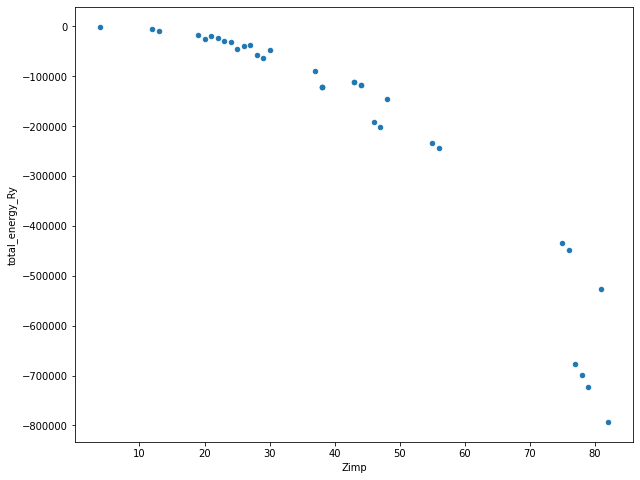

In [102]:
table.plot.scatter(x='Zimp', y='total_energy_Ry', figsize=(10,8))

What if I don't want *all* columns, or columns in a different format (for instance, list -> max(list))? Use tabulator recipes and transformers.

In [126]:
from aiida_jutools.io.tabulator.transformers import TransformedValue

class MyTransformer(jutools.io.tabulator.Transformer):
    def transform(self, keypath, value, obj, **kwargs) -> TransformedValue:
        if 'total_spin_moment_all_iterations' in keypath:
            return TransformedValue(True, max(value))
        else:
            return TransformedValue(False, value)

In [128]:
recipe = jutools.io.tabulator.Recipe(include_list=['uuid', 'Zimp', 'total_energy_Ry'], transformer=MyTransformer())

In [129]:
my_tabulator = jutools.io.tabulator.NodeTabulator(recipe)

## `.process` and `.submit`

Finding and sorting process nodes.

In [114]:
jutools.process.get_process_states()

['created', 'running', 'waiting', 'finished', 'excepted', 'killed']

In [121]:
all_kkr_impurity_workchains = jutools.process.query_processes(process_label='kkr_imp_wc', process_states=['finished'], exit_statuses=[141,142,143,144,145]).all(flat=True)

In [122]:
all_kkr_impurity_workchains

[<WorkChainNode: uuid: bbfc1bd4-612a-495b-b8bc-4d907ac7562c (pk: 26425) (aiida.workflows:kkr.imp)>,
 <WorkChainNode: uuid: 7bc8a7c8-0320-42b4-8ecc-37528871577f (pk: 26444) (aiida.workflows:kkr.imp)>]

Sort processes by process state into subgroups.

In [131]:
process_sorter = jutools.process.ProcessClassifier(group=example_group)

In [ ]:
process_sorter.classify()

In [133]:
jutools.group.verdi_group_list(label_filter='/imp/scale_factor_1.0')

[['label', 'id', 'type_string'],
 ['imp_embeddings_for_ml/imp/scale_factor_1.0', 71, 'core'],
 ['imp_embeddings_for_ml/imp/scale_factor_1.0/failed', 130, 'core'],
 ['imp_embeddings_for_ml/imp/scale_factor_1.0/finished_ok', 129, 'core']]

------

Submit processes in bulk.

In [140]:
settings = jutools.submit.BlockingSubmissionControllerSettings()

In [141]:
settings

BlockingSubmissionControllerSettings(dry_run=True, max_top_processes_running=30, max_all_processes_running=60, wait_for_submit=5, max_wait_for_submit=240, wait_after_submit=2, resubmit_failed=False, resubmit_failed_as_restart=False, delete_if_stalling=False, delete_if_stalling_dry_run=False, max_wait_for_stalling=240)

In [142]:
controller = jutools.submit.BlockingSubmissionController(settings)

In [ ]:
controller.submit

## Miscellaneous: `.process_functions`, `.plugins`, `.meta`